# First Mathematical Program in Python Using SCIP

## (1) Introduction to SCIP

### 🔹 What is SCIP?
SCIP (**Solving Constraint Integer Programs**) is an **open-source solver** for:
- **Linear Programming (LP)**
- **Mixed-Integer Programming (MIP)**
- **Mixed-Integer Nonlinear Programming (MINLP)**

It is widely used in **academic research** and **industrial applications** for solving optimization problems.

### 🔹 Why Use SCIP?
- Supports **linear, integer, and binary programming**
- Provides **flexible constraint modeling**
- Open-source and free to use
- Efficient solver performance compared to commercial alternatives (like CPLEX or Gurobi)

### 🔹 Installing SCIP
To use SCIP with Python, install `PySCIPOpt`:
```bash
pip install pyscipopt
```
You should have already completed this step yesterday. 

### 🔹 Creating and Managing SCIP Models
Whenever you want to **define and solve an optimization problem in SCIP**, you need to:
1. **Create a model object** → Every problem to be solved requires a separate SCIP model instance.
2. **Add variables** → Decision variables must be explicitly defined.
3. **Define constraints and objective functions** → These describe the mathematical structure of the optimization problem.
4. **Solve the model** → After setup, the solver finds the optimal solution.
5. **Extract and interpret results** → Read solution values and analyze solver output.

### 🔹 Importing SCIP in Python

In [ ]:
from pyscipopt import Model  # Import SCIP solver interface

# Step 1: Create a SCIP model instance
model = Model("First SCIP Model")  # Every model is a separate object

# Step 2: Print confirmation
print("SCIP successfully imported and model object created!")


## (2) Implementing a Simple Linear Program

### 🔹 Production Planning Problem as an example of a linear program
We will implement and solve the following **linear program (LP)**:

#### Problem Statement:
A company produces two types of washing powder: **Super-Clean** and **Ultra-Clean**. The production process uses **three machines**, each with a limited number of available hours per day.

#### Objective:
Maximize the total profit from production.

#### Decision Variables:
- $ x_1 $: Amount of **Super-Clean** produced (in tons per day)
- $ x_2 $: Amount of **Ultra-Clean** produced (in tons per day)

####  Explanation:
- **Objective function**: Maximize $$ z = 3x + 5y $$
**Subject to:**
1. **Machine A Constraint:**: Ultra-Clean production is limited to **6 tons per day** due to Machine A’s capacity.
   $$   x_2 \leq 6 $$

2. **Machine B Constraint:**: The total production of both types **cannot exceed 7 tons per day** due to Machine B’s limitation.
   $$
   x_1 + x_2 \leq 7
   $$

3. **Machine C Constraint:**: Machine C has **18 hours per day available**, and each ton of Super-Clean requires **3 hours**, while each ton of Ultra-Clean requires **2 hours**.
   $$
   3x_1 + 2x_2 \leq 18
   $$
  

4. **Non-Negativity Constraints:**: Negative production values are not possible.
   $$
   x_1, x_2 \geq 0
   $$

#### 📌 Example: Implementing this problem in SCIP

In [6]:
from pyscipopt import Model

# Step 1: Create the SCIP model instance
model = Model("Production Planning")

# Step 2: Define Decision Variables
x1 = model.addVar("x1", vtype="C", lb=0)  # Super-Clean (vtype = variable type; "C" = continuous, "lb" = lower bound --> non-negative)
x2 = model.addVar("x2", vtype="C", lb=0)  # Ultra-Clean (continuous, non-negative)

# Step 3: Define the Objective Function (Maximize Profit)
model.setObjective(4 * x1 + 3 * x2, sense="maximize")

# Step 4: Add Constraints
model.addCons(x2 <= 6, "Machine_A")      # Constraint for Machine A
model.addCons(x1 + x2 <= 7, "Machine_B")  # Constraint for Machine B
model.addCons(3 * x1 + 2 * x2 <= 18, "Machine_C")  # Constraint for Machine C

# Step 5: Solve the Model
model.optimize()

# Step 6: Extract and Print Results
if model.getStatus() == "optimal":
    x1_opt = model.getVal(x1)
    x2_opt = model.getVal(x2)
    obj_opt = model.getObjVal()
    print(f"Optimal Production Plan: Super-Clean = {x1_opt}, Ultra-Clean = {x2_opt}")
    print(f"Maximum Profit: {obj_opt}")
else:
    print("No optimal solution found.")

Optimal Production Plan: Super-Clean = 4.0, Ultra-Clean = 3.0
Maximum Profit: 25.0


#### With Matplotlib it is relatively easy to plot the above problem. 

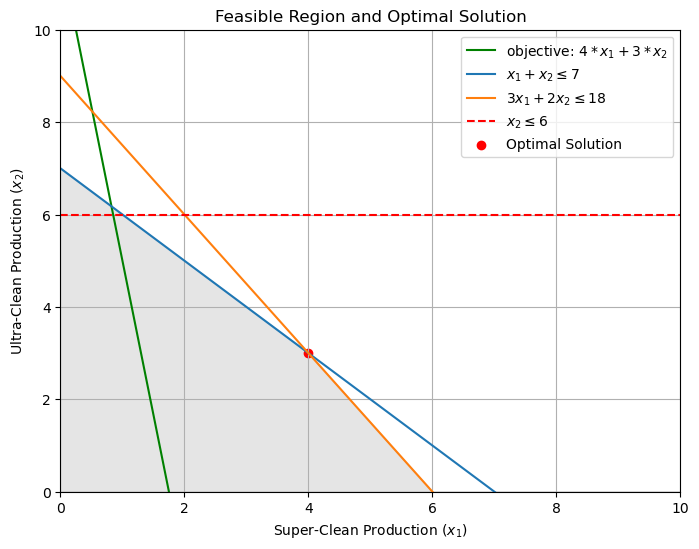

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 7: Visualizing the Feasible Region
x_vals = np.linspace(0, 10, 200)
obj = 35/3-20/3*x_vals  # Objective Function
y1 = np.minimum(6, np.inf)  # Machine A constraint
y2 = 7 - x_vals  # Machine B constraint
y3 = (18 - 3*x_vals) / 2  # Machine C constraint

plt.figure(figsize=(8, 6))
plt.plot(x_vals, obj, color = "green", label=r"objective: $4*x_1 + 3*x_2$")
plt.plot(x_vals, y2, label=r"$x_1 + x_2 \leq 7$")
plt.plot(x_vals, y3, label=r"$3x_1 + 2x_2 \leq 18$")
plt.axhline(y=6, color='r', linestyle='--', label=r"$x_2 \leq 6$")
plt.fill_between(x_vals, 0, np.minimum(y2, y3), alpha=0.2, color='gray')
plt.scatter(x1_opt, x2_opt, color='red', label='Optimal Solution')
plt.xlabel("Super-Clean Production ($x_1$)")
plt.ylabel("Ultra-Clean Production ($x_2$)")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()

### ✏️ Task: Modify the Model
Change the production capacity of **Machine C** from **18 hours** to **16 hours**, solve the problem again, and replot the solution.

1. Modify the constraint: 
   $$ 
   3x_1 + 2x_2 \leq 16
   $$
2. Solve the new model.
3. Plot the new feasible region and optimal solution.

The code below, is a copy of the above code. Modify it to complete the task!

Optimal Production Plan: Super-Clean = 2.0, Ultra-Clean = 5.0
Maximum Profit: 23.0


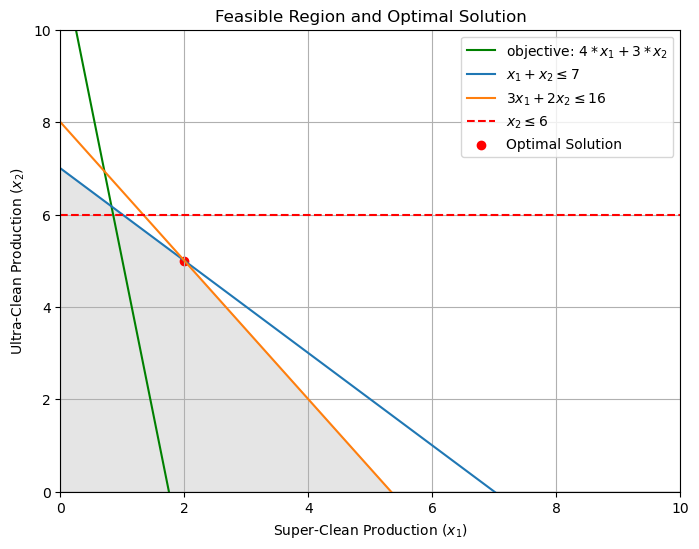

In [8]:
# Step 1: Create the SCIP model instance
model = Model("Production Planning 2")

# Step 2: Define Decision Variables
x1 = model.addVar("x1", vtype="C", lb=0)  # Super-Clean (vtype = variable type; "C" = continuous, "lb" = lower bound --> non-negative)
x2 = model.addVar("x2", vtype="C", lb=0)  # Ultra-Clean (continuous, non-negative)

# Step 3: Define the Objective Function (Maximize Profit)
model.setObjective(4 * x1 + 3 * x2, sense="maximize")

# Step 4: Add Constraints
model.addCons(x2 <= 6, "Machine_A")      # Constraint for Machine A
model.addCons(x1 + x2 <= 7, "Machine_B")  # Constraint for Machine B
model.addCons(3 * x1 + 2 * x2 <= 16, "Machine_C")  # Constraint for Machine C

# Step 5: Solve the Model
model.optimize()

# Step 6: Extract and Print Results
if model.getStatus() == "optimal":
    x1_opt = model.getVal(x1)
    x2_opt = model.getVal(x2)
    obj_opt = model.getObjVal()
    print(f"Optimal Production Plan: Super-Clean = {x1_opt}, Ultra-Clean = {x2_opt}")
    print(f"Maximum Profit: {obj_opt}")
else:
    print("No optimal solution found.")

# Step 7: Visualizing the Feasible Region
x_vals = np.linspace(0, 10, 200)
obj = 35/3-20/3*x_vals  # Objective Function
y1 = np.minimum(6, np.inf)  # Machine A constraint
y2 = 7 - x_vals  # Machine B constraint
y3 = (16 - 3*x_vals) / 2  # Machine C constraint

plt.figure(figsize=(8, 6))
plt.plot(x_vals, obj, color = "green", label=r"objective: $4*x_1 + 3*x_2$")
plt.plot(x_vals, y2, label=r"$x_1 + x_2 \leq 7$")
plt.plot(x_vals, y3, label=r"$3x_1 + 2x_2 \leq 16$")
plt.axhline(y=6, color='r', linestyle='--', label=r"$x_2 \leq 6$")
plt.fill_between(x_vals, 0, np.minimum(y2, y3), alpha=0.2, color='gray')
plt.scatter(x1_opt, x2_opt, color='red', label='Optimal Solution')
plt.xlabel("Super-Clean Production ($x_1$)")
plt.ylabel("Ultra-Clean Production ($x_2$)")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()

### ✏️ Task: What happens when the price of Ultra-Clean increases from 3 to 4?

Optimal Production Plan: Super-Clean = 1.0000000000000009, Ultra-Clean = 6.0
Maximum Profit: 28.000000000000004


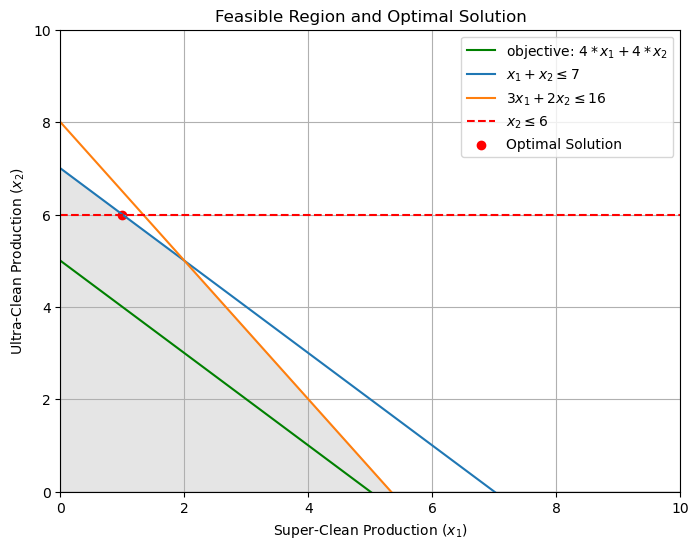

In [13]:
# Step 1: Create the SCIP model instance
model = Model("Production Planning 2")

# Step 2: Define Decision Variables
x1 = model.addVar("x1", vtype="C", lb=0)  # Super-Clean (vtype = variable type; "C" = continuous, "lb" = lower bound --> non-negative)
x2 = model.addVar("x2", vtype="C", lb=0)  # Ultra-Clean (continuous, non-negative)

# Step 3: Define the Objective Function (Maximize Profit)
model.setObjective(4 * x1 + 4 * x2, sense="maximize")

# Step 4: Add Constraints
model.addCons(x2 <= 6, "Machine_A")      # Constraint for Machine A
model.addCons(x1 + x2 <= 7, "Machine_B")  # Constraint for Machine B
model.addCons(3 * x1 + 2 * x2 <= 16, "Machine_C")  # Constraint for Machine C

# Step 5: Solve the Model
model.optimize()

# Step 6: Extract and Print Results
if model.getStatus() == "optimal":
    x1_opt = model.getVal(x1)
    x2_opt = model.getVal(x2)
    obj_opt = model.getObjVal()
    print(f"Optimal Production Plan: Super-Clean = {x1_opt}, Ultra-Clean = {x2_opt}")
    print(f"Maximum Profit: {obj_opt}")
else:
    print("No optimal solution found.")

# Step 7: Visualizing the Feasible Region
x_vals = np.linspace(0, 10, 200)
obj = 20/4-x_vals  # Objective Function
y1 = np.minimum(6, np.inf)  # Machine A constraint
y2 = 7 - x_vals  # Machine B constraint
y3 = (16 - 3*x_vals) / 2  # Machine C constraint

plt.figure(figsize=(8, 6))
plt.plot(x_vals, obj, color = "green", label=r"objective: $4*x_1 + 4*x_2$")
plt.plot(x_vals, y2, label=r"$x_1 + x_2 \leq 7$")
plt.plot(x_vals, y3, label=r"$3x_1 + 2x_2 \leq 16$")
plt.axhline(y=6, color='r', linestyle='--', label=r"$x_2 \leq 6$")
plt.fill_between(x_vals, 0, np.minimum(y2, y3), alpha=0.2, color='gray')
plt.scatter(x1_opt, x2_opt, color='red', label='Optimal Solution')
plt.xlabel("Super-Clean Production ($x_1$)")
plt.ylabel("Ultra-Clean Production ($x_2$)")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()

## (3) Implementing a Simple Integer Linear Program

### 🔹 Production Planning as an Example of an Integer Optimization Problem
We will implement and solve the following **integer linear program (ILP)**:

#### Problem Statement:
A company produces two types of products, **Product A** and **Product B**. The production process requires resources with limited availability per day.

#### Objective:
Maximize total profit from production.

#### Decision Variables:
- $ x_1 $: Number of **Product A** produced per day (**integer**)
- $ x_2 $: Number of **Product B** produced per day (**integer**)

#### Mathematical Model:
**Maximize:**
$
  z = 5x_1 + 8x_2
$

**Subject to:**
1. **Resource 1 Constraint:**: Each unit of Product A requires **2** units of Resource 1, and each unit of Product B requires **3** units. The total available is **12**.
   $$
   2x_1 + 3x_2 \leq 12
   $$  

2. **Resource 2 Constraint:**: Each unit of Product A requires **1** unit of Resource 2, and each unit of Product B requires **2** units. The total available is **8**.
   $$
   x_1 + 2x_2 \leq 8
   $$ 

3. **Integer and Non-Negativity Constraints:**: The number of products produced must be **whole numbers**.
   $$
   x_1, x_2 \geq 0, \quad x_1, x_2 \in \mathbb{Z}
   $$ 

#### 📌 Example: Implementing this problem in SCIP

In [14]:
# Step 1: Create the SCIP model instance
model = Model("Integer Production Planning")

# Step 2: Define Decision Variables (Integers)
x1 = model.addVar("x1", vtype="I", lb=0)  # Product A (vtype "I": integer, lb=0: non-negative)
x2 = model.addVar("x2", vtype="I", lb=0)  # Product B (integer, non-negative)

# Step 3: Define the Objective Function (Maximize Profit)
model.setObjective(x1 + 2 * x2, sense="maximize")

# Step 4: Add Constraints
model.addCons(x1 + 3 * x2 <= 7, "Resource_1")      # Constraint for Resource 1
model.addCons(3*x1 + 2 * x2 <= 10, "Resource_2")  # Constraint for Resource 2

# Step 5: Solve the Model
model.optimize()

# Step 6: Extract and Print Results
if model.getStatus() == "optimal":
    x1_opt = model.getVal(x1)
    x2_opt = model.getVal(x2)
    obj_opt = model.getObjVal()
    print(f"Optimal Production Plan: Product A = {x1_opt}, Product B = {x2_opt}")
    print(f"Maximum Profit: {obj_opt}")
else:
    print("No optimal solution found.")

Optimal Production Plan: Product A = 1.0, Product B = 2.0
Maximum Profit: 5.0


#### Again, we can use Matplotlib to plot the above problem. 

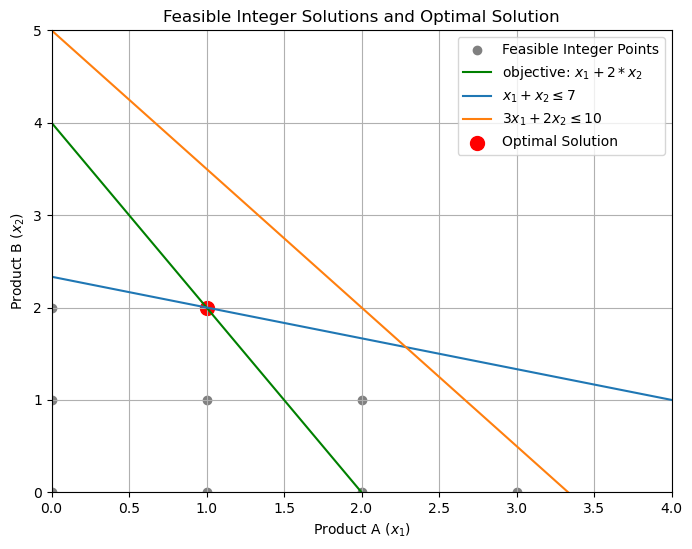

In [15]:
# Step: Visualizing Integer Feasible Solutions

# Obtain the set of feasible points
x1_vals = np.arange(0, 10)
x2_vals = np.arange(0, 10)
feasible_points = []
for x1 in x1_vals:
    for x2 in x2_vals:
        if (x1 + 3*x2 <= 7) and (3*x1 + 2*x2 <= 10):
            feasible_points.append((x1, x2))

feasible_x1, feasible_x2 = zip(*feasible_points)
plt.figure(figsize=(8, 6))
plt.scatter(feasible_x1, feasible_x2, color='gray', label='Feasible Integer Points')


#Plot Constraints
x_vals = np.linspace(0, 10, 200)
obj = 4-(2)*x_vals  # objective function
y1 = 7/3-(1/3)*x_vals  # Machine A constraint
y2 = 5-  1.5*x_vals  # Machine B constraint
plt.plot(x_vals, obj, color = "green", label=r"objective: $x_1 + 2*x_2$")
plt.plot(x_vals, y1, label=r"$x_1 + x_2 \leq 7$")
plt.plot(x_vals, y2, label=r"$3x_1 + 2x_2 \leq 10$")

# Plot optimal solution
plt.scatter(x1_opt, x2_opt, color='red', s=100, label='Optimal Solution')

plt.xlabel("Product A ($x_1$)")
plt.ylabel("Product B ($x_2$)")
plt.xlim([0,4])
plt.ylim([0,5])
plt.title("Feasible Integer Solutions and Optimal Solution")
plt.legend()
plt.grid()
plt.show()

### ✏️ Task: What happens when you change the variable type to continuous?


Optimal Production Plan: Product A = 2.2857142857142856, Product B = 1.5714285714285714
Maximum Profit: 5.428571428571429


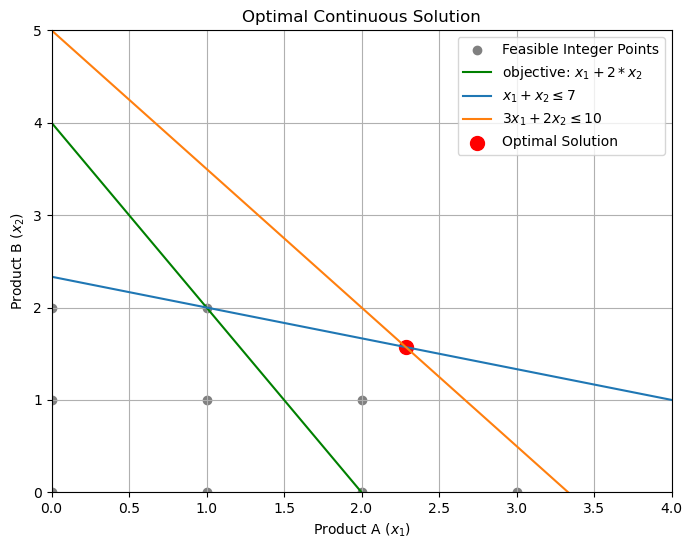

In [17]:
# Step 1: Create the SCIP model instance
model = Model("Integer Production Planning")

# Step 2: Define Decision Variables (Integers)
x1 = model.addVar("x1", vtype="C", lb=0)  # Product A (vtype "I": integer, lb=0: non-negative)
x2 = model.addVar("x2", vtype="C", lb=0)  # Product B (integer, non-negative)

# Step 3: Define the Objective Function (Maximize Profit)
model.setObjective(x1 + 2 * x2, sense="maximize")

# Step 4: Add Constraints
model.addCons(x1 + 3 * x2 <= 7, "Resource_1")      # Constraint for Resource 1
model.addCons(3*x1 + 2 * x2 <= 10, "Resource_2")  # Constraint for Resource 2

# Step 5: Solve the Model
model.optimize()

# Step 6: Extract and Print Results
if model.getStatus() == "optimal":
    x1_opt = model.getVal(x1)
    x2_opt = model.getVal(x2)
    obj_opt = model.getObjVal()
    print(f"Optimal Production Plan: Product A = {x1_opt}, Product B = {x2_opt}")
    print(f"Maximum Profit: {obj_opt}")
else:
    print("No optimal solution found.")
# Step: Visualizing Integer Feasible Solutions

# Obtain the set of feasible points
x1_vals = np.arange(0, 10)
x2_vals = np.arange(0, 10)
feasible_points = []
for x1 in x1_vals:
    for x2 in x2_vals:
        if (x1 + 3*x2 <= 7) and (3*x1 + 2*x2 <= 10):
            feasible_points.append((x1, x2))

feasible_x1, feasible_x2 = zip(*feasible_points)
plt.figure(figsize=(8, 6))
plt.scatter(feasible_x1, feasible_x2, color='gray', label='Feasible Integer Points')


#Plot Constraints
x_vals = np.linspace(0, 10, 200)
obj = 4-(2)*x_vals  # objective function
y1 = 7/3-(1/3)*x_vals  # Machine A constraint
y2 = 5-  1.5*x_vals  # Machine B constraint
plt.plot(x_vals, obj, color = "green", label=r"objective: $x_1 + 2*x_2$")
plt.plot(x_vals, y1, label=r"$x_1 + x_2 \leq 7$")
plt.plot(x_vals, y2, label=r"$3x_1 + 2x_2 \leq 10$")

# Plot optimal solution
plt.scatter(x1_opt, x2_opt, color='red', s=100, label='Optimal Solution')

plt.xlabel("Product A ($x_1$)")
plt.ylabel("Product B ($x_2$)")
plt.xlim([0,4])
plt.ylim([0,5])
plt.title("Optimal Continuous Solution")
plt.legend()
plt.grid()
plt.show()

## (4) Implementing Parameterized Models with Arrays and Dictionaries

### 📌 Example: Knapsack Problem

The **Knapsack Problem** is a well-known combinatorial optimization problem where we must decide which items to include in a knapsack to maximize value while respecting a weight limit.

#### **Problem Statement:**
We have **n** items, each with:
- **Profit** $ p_i $
- **Weight** $ w_i $

We want to **maximize total profit** while ensuring the **total weight does not exceed a given limit** \( W \).

#### **Mathematical Formulation:**
Maximize:
$$
  z = \sum_{i=1}^{n} p_i x_i
$$
subject to:
$$
  \sum_{i=1}^{n} w_i x_i \leq W
$$
$$
  x_i \in \{0,1\} \quad \forall i \in \{1,2,\dots,n\}
$$

where:
- $ x_i $ is a **binary variable** indicating whether item $ i $ is included in the knapsack.
- The **constraint ensures** the total weight does not exceed $ W $.

#### 📌 Next Step: Implementing the Knapsack Problem in SCIP

In [ ]:
from pyscipopt import Model, quicksum

# Define problem data using a dictionary
# A dictionary is a collection of items that are stored as key-value pairs
# In this case, the keys are the item names and the values are dictionaries containing the profit and weight of each item
items = {
    "item1": {"profit": 10, "weight": 2},
    "item2": {"profit": 15, "weight": 3},
    "item3": {"profit": 20, "weight": 5},
    "item4": {"profit": 30, "weight": 8},
}
capacity = 10  # Maximum weight allowed in the knapsack

# Create SCIP model
model = Model("Knapsack Problem")

# Define decision as a dictionary
# The keys are the item names and the values are the binary decision variables for selecting the items
x = {}  # Empty dictionary to store decision variables
for i in items: 
    x[i] = model.addVar(vtype="B", name=f"x_{i}")    # vtype="B" means binary variable (0 or 1)
                                                     # name="x" is the name prefix for the variables
                                                     # The keys of the items dictionary are used as variable names
                                                    

# Define objective function: maximize total profit
model.setObjective(quicksum(items[i]["profit"] * x[i] for i in items), "maximize") # quicksum is a SCIP function, it sums up the values of the items
                                                                                   # the sum is over all items, and for each item, we multiply its profit by the corresponding decision variable 


# Define constraint: total weight must not exceed capacity
model.addCons(quicksum(items[i]["weight"] * x[i] for i in items) <= capacity) # The total weight of the selected items must be less than or equal to the capacity

# Solve model
model.optimize()

# Extract and print solution
if model.getStatus() == "optimal":
    print("Optimal solution found!")
    print("Selected items:")
    for item in items:
        if model.getVal(x[item]) > 0.5:
            print(f"- {item} (profit: {items[item]['profit']}, weight: {items[item]['weight']})")
    print(f"Total profit: {model.getObjVal()}")
else:
    print("No optimal solution found.")

## (5) Loading Knapsack Data from an Excel File

### 📌 Step 1: Load and Examine the Data
We will now load **knapsack problem data from an Excel file**, explore its structure, and use it to build our SCIP model.

#### 📌 Example: Loading Data from Excel

In [ ]:
import pandas as pd

# Load the dataset
file_path = "../data/knapsack_large.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

# Display first few rows
print("First 5 rows of the dataset:\n", df.head())

# Show summary statistics
print("\nDataset Info:")
df.describe()


### 📌 Step 2: Implementing the Knapsack Model with SCIP
Now that we have loaded our dataset, we will:
1. **Extract the necessary data** (profits, weights)
2. **Set the capacity to 20,000.**
3. **Create a SCIP model**
4. **Define variables, objective function, and constraints**
5. **Solve the model with a time limit of 30 seconds**

#### 📌 Example: Implementing the Model

In [ ]:
from pyscipopt import Model, quicksum

# Extract data from the dataframe
items = {row["Name"]: {"profit": row["Profit"], "weight": row["Weight"]} for _, row in df.iterrows()}
#Set capacity
capacity = 64*300

# Create SCIP model
model = Model("Knapsack Problem")

# Define decision variables using vardict
x = {}  # Empty dictionary to store decision variables
for i in items: 
    x[i] = model.addVar(vtype="B", name=f"x_{i}")    # vtype="B" means binary variable (0 or 1)
                                                     # name="x" is the name prefix for the variables
                                                     # The keys of the items dictionary are used as variable names
                                                    

# Define objective function: maximize total profit
model.setObjective(quicksum(items[i]["profit"] * x[i] for i in items), "maximize")

# Define constraint: total weight must not exceed capacity
model.addCons(quicksum(items[i]["weight"] * x[i] for i in items) <= capacity)

# Solve model
model.optimize()

# Extract and print solution
if model.getStatus() == "optimal":
    print("Optimal solution found!")
    print("Selected items:")
    for item in items:
        if model.getVal(x[item]) > 0.5:
            print(f"- {item} (profit: {items[item]['profit']}, weight: {items[item]['weight']})")
    print(f"Total profit: {model.getObjVal()}")
else:
    print("No optimal solution found within time limit.")

## (6) Modify Solver Settings
### 📌 Example: Setting a Time Limit
For large instances, we might want to **limit the computation time** to avoid excessive runtimes.

In [ ]:

model.setParam("limits/time", 30)  # Set max solve time to 30 seconds
print("Time limit set to 30 seconds.")

## (6) Exploring SCIP Further

Congratulations on completing this session! You have now learned how to:
✅ Set up and use SCIP in Python
✅ Define and solve linear, integer, and binary optimization models
✅ Work with data-driven optimization using Pandas and Excel files
✅ Adjust solver parameters for performance tuning

### 🔹 Where to Learn More?
To further explore SCIP’s capabilities, check out the following resources:

🔗 **SCIP Official Documentation** – Learn more about the solver and its advanced features:
👉 [SCIP Documentation](https://scipopt.org/doc/html/)

🔗 **PySCIPOpt GitHub Repository** – Explore more Python-based examples:
👉 [PySCIPOpt on GitHub](https://github.com/scipopt/PySCIPOpt)

🔗 **SCIP Example Problems** – Browse through different models and applications:
👉 [SCIP Examples](https://scipopt.org/#examples)